# Double Descent and Random Feature Regression
by Evans Hedges for the Mathematics of Artificial Intelligence and Machine Learning @ the University of Denver. 


Abstract: This talk will explore the double descent phenomenon by means of random feature regression. 

First observed in 2018 by Belkin et. al (link below), double descent is a strange and poorly understood phenomenon that counters typical statistical intuition. According to classical statistics, as the number of model parameters (p) increases, typically you will find an increase in model performance on out of sample data, followed by a sharp decrease that only gets worse as you add more parameters. Recent empirical work has shown that this not the case. Instead, the generalizability of a particular model generally exhibits a “double descent” phenomenon, first following classical statistics intuition until the interpolation threshold of p=n, but counterintuitively once you enter the overparameterized regime (p>n), the model beings to perform better out of sample once again. 


Citations: 
* Belkin 2018: https://arxiv.org/abs/1812.11118 
* OpenAI 2019: https://arxiv.org/abs/1912.02292 


Other sources: 
* https://www.greaterwrong.com/posts/FRv7ryoqtvSuqBxuT/understanding-deep-double-descent
* https://arxiv.org/abs/1908.05355 




_____
# Part 1: Polynomial Regression

We will first look at polynomial regression to see how even this problem with a bit of noise may exhibit the double descent phenomenon. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


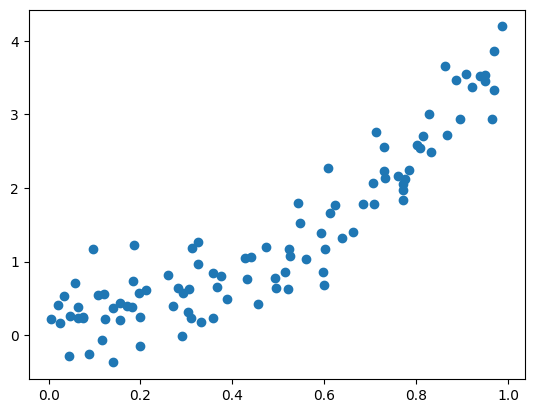

In [46]:
# Generate some data
np.random.seed(42)
# uniform 50 datapoints between 0 and 1
num_datapoints = 100
x = np.random.rand(num_datapoints)
y = 2 * x - x ** 2 + 3 * x ** 3 + 0.4 * np.random.randn(num_datapoints)

# plot data
plt.scatter(x, y)

In [3]:
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
n = len(x_train)


NameError: name 'x' is not defined

In [4]:
from sklearn.linear_model import LinearRegression


In [49]:
test_loss = []
train_loss = []
p_over_n = []

# Test polynomial regression for various values of m
for m in range(1, 1000): 
    m_x_train = np.array([x_train ** i for i in range(m)]).T
    m_x_test = np.array([x_test ** i for i in range(m)]).T

    # Fit the model
    model = LinearRegression()
    model.fit(m_x_train, y_train)

    # Compute the loss
    y_pred_test = model.predict(m_x_test)
    y_pred_train = model.predict(m_x_train)
    
    p_over_n.append(m / n)
    test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    train_loss.append(np.mean((y_pred_train - y_train) ** 2))


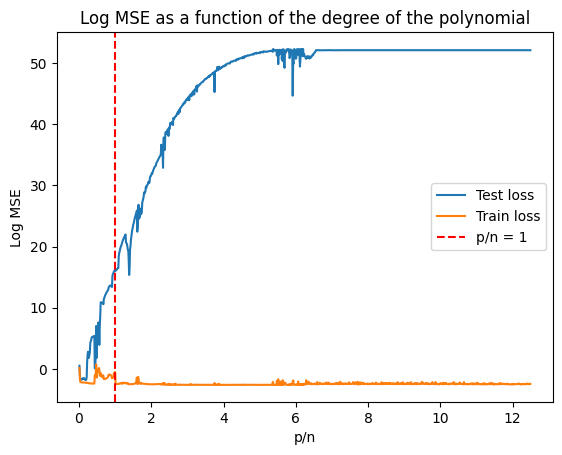

In [50]:
# Plot the loss
plt.plot(p_over_n, np.log(test_loss), label='Test loss')
plt.plot(p_over_n, np.log(train_loss), label='Train loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the degree of the polynomial')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

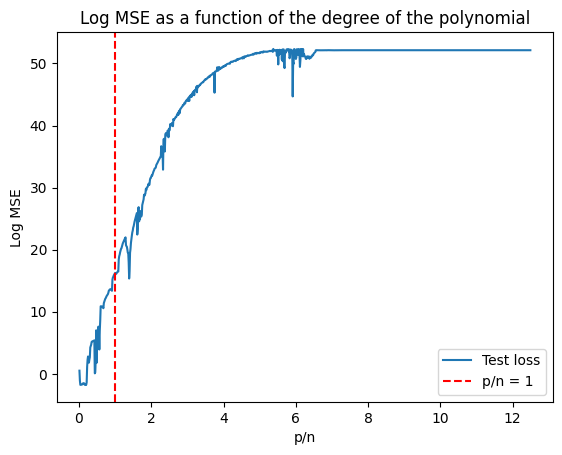

In [51]:
# Plot the loss - scaling left and right axis for better visualization
plt.plot(p_over_n, np.log(test_loss), label='Test loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the degree of the polynomial')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

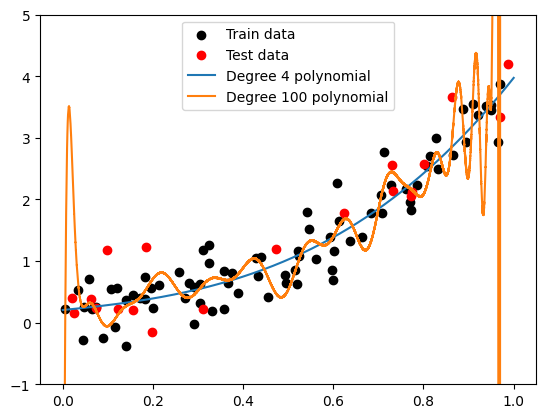

In [52]:
# Train m1-1 degree polynomial regression
m1 = 4
m1_x_train = np.array([x_train ** i for i in range(m1)]).T
model_deg3 = LinearRegression()
model_deg3.fit(m1_x_train, y_train)

# Train m2-1 degree polynomial regression
m2 = 100
m2_x_train = np.array([x_train ** i for i in range(m2)]).T
model_deg30 = LinearRegression()
model_deg30.fit(m2_x_train, y_train)

# Plot 
plt.scatter(x_train, y_train, label='Train data', color='black')
plt.scatter(x_test, y_test, label='Test data', color='red')
x_plot = np.linspace(0, 1, 100000)
y_plot = model_deg3.predict(np.array([x_plot ** i for i in range(m1)]).T)
plt.plot(x_plot, y_plot, label=f'Degree {m1} polynomial')
y_plot = model_deg30.predict(np.array([x_plot ** i for i in range(m2)]).T)
plt.plot(x_plot, y_plot, label=f'Degree {m2} polynomial')
plt.ylim(-1, 5)
plt.legend()
plt.show()

A degree 100 polynomial with 80 datapoints should exactly interpolate the dataset. As you can see this is not happening. This is likely due to the fact that with this kind of polynomial regression, many of the coefficients are rounding to $0$ within floating point arithmatic. For example, anything less than $0.5$ will be rounded to $0$ for $x^{80}$. 

# Lets try Ridge Regularization 

We will move away from polynomial regression soon, but first lets look at what happens when we enter the overparameterized regime with a small $\ell_2$ penalty. 

In [5]:
from sklearn.linear_model import Ridge


In [54]:
test_loss = []
train_loss = []
p_over_n = []

# Test polynomial regression for various values of m
for m in range(2, 300): 
    m_x_train = np.array([x_train ** i for i in range(m)]).T
    m_x_test = np.array([x_test ** i for i in range(m)]).T

    # Fit the model
    model = Ridge(alpha=0.1)
    model.fit(m_x_train, y_train)

    # Compute the loss
    y_pred_test = model.predict(m_x_test)
    y_pred_train = model.predict(m_x_train)

    p_over_n.append(m / n)
    test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    train_loss.append(np.mean((y_pred_train - y_train) ** 2))


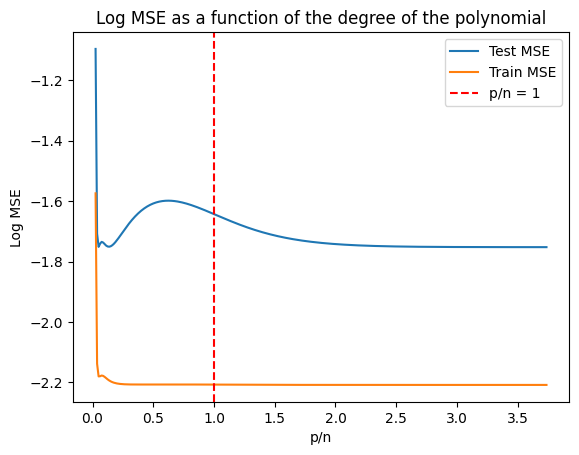

In [55]:
# Plot the loss
plt.plot(p_over_n, np.log(test_loss), label='Test MSE')
plt.plot(p_over_n, np.log(train_loss), label='Train MSE')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')

plt.title('Log MSE as a function of the degree of the polynomial')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

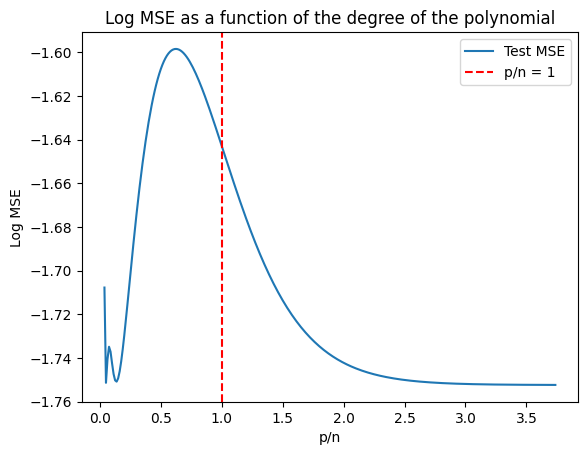

In [56]:
# Plot the loss - scaling left and right axis for better visualization
plt.plot(p_over_n[1:], np.log(test_loss)[1:], label='Test MSE')
plt.title('Log MSE as a function of the degree of the polynomial')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

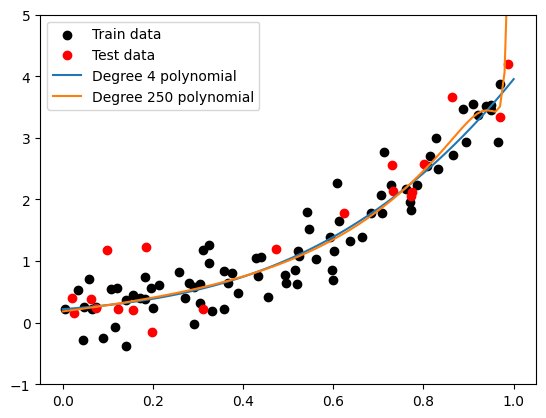

In [57]:
# Train 3rd degree polynomial regression
m1 = 4
m1_x_train = np.array([x_train ** i for i in range(m1)]).T
model_deg3 = Ridge(alpha=0.01)
model_deg3.fit(m1_x_train, y_train)

# Train 30 degree polynomial regression
m2 = 250
m2_x_train = np.array([x_train ** i for i in range(m2)]).T
model_deg30 = Ridge(alpha=0.01)
model_deg30.fit(m2_x_train, y_train)

# Plot 
plt.scatter(x_train, y_train, label='Train data', color='black')
plt.scatter(x_test, y_test, label='Test data', color='red')
x_plot = np.linspace(0, 1, 100)
y_plot = model_deg3.predict(np.array([x_plot ** i for i in range(m1)]).T)
plt.plot(x_plot, y_plot, label=f'Degree {m1} polynomial')
y_plot = model_deg30.predict(np.array([x_plot ** i for i in range(m2)]).T)
plt.plot(x_plot, y_plot, label=f'Degree {m2} polynomial')
plt.ylim(-1, 5)
plt.legend()
plt.show()

________
# Random Feature Regression

We will now move into the world of random feature regression. In general, we have some $f(X) = y$ that we want to model. If the relationship is linear, we of course should use linear regression of some kind. However, frequently the $f$ we want to model is not linear. In this setting, we need to add some non-linearity to our modeling. 

This can be done via polynomial regression, kernel methods, $KNN$ techniques, neural networks, etc. 

The method I would like to explore today is Random Feature Regression. 


$\;$

The core idea is that we generate random features via non-linear transformations, and from these randomly generated features we run a regular linear regression. 

In theory, we hope the random transformations push $X$ into a much higher dimensional space in a non-linear way that captures the true non-linear aspects of $f$, and we can then simply run a linear regression on the transformed dataset. 

______

# Generate Random Features

For the talk today, we will generate random features using a random linear transformation into higher dimensional space, followed by a radial basis function to conduct a non-linear transformation. 

Let $X$ be our dataset $(n \times k)$ and $y$ be our target variable. 

We initialize our random linear transformation so that $W$ is a $(k \times N)$ matrix such that 
$$W_{i, j} \sim N(0, 1)$$
We also add a random bias vector 
$$b \sim U(0, 2\pi)$$
Where $U$ is a uniform distribution. 

We then transform our data linearly so that we generate 
$$Z = X W^T + b$$

Notice that $Z$ is a $(n \times N)$ matrix, representing a new dataset such that each datapoint has $N$ features and each of these features was generated by a random linear combination of the $k$ features from each original datapoint (then adding $b$). From here, we take some fixed non-linear transformation $\sigma(Z)$ and the resulting values will be our features. 

$\;$

We first try using the non-linear function 



In [58]:
# create a random feature regressor class
# gamma RBFSampler parameters
class RandomFeatureRegressor:
    def __init__(self, num_features, gamma=1.0, alpha = 0):
        self.num_features = num_features
        self.gamma = gamma
        self.alpha = alpha

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        n_samples, n_features = X.shape
        self.W = np.random.normal(0, 1, (self.num_features, n_features))
        self.b = np.random.uniform(0, 2 * np.pi, self.num_features)
        Z = self._transform(X)
        if self.alpha == 0: 
            self.model = LinearRegression()
        else: 
            self.model = Ridge(alpha=self.alpha)
        self.model.fit(Z, y)

    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Z = self._transform(X)
        return self.model.predict(Z)

    def _transform(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        Z = np.dot(X, self.W.T) * np.sqrt(2 * self.gamma) + self.b
        return np.sqrt(2 / self.num_features) * np.cos(Z)


In [59]:
# Generate features x, x^2 from x_train
x_train2 = []
x_test2 = []
for x in x_train:
    x_train2.append([x, x ** 2, x ** 3])

for x in x_test:
    x_test2.append([x, x ** 2, x ** 3])

x_train2 = np.array(x_train2)
x_test2 = np.array(x_test2)



In [60]:
import time 

random_feature_regression_test_loss = []
random_feature_regression_train_loss = []
p_over_n = []

start_time = time.time()
for m in range(1, 5000):
    model = RandomFeatureRegressor(num_features=m, gamma=3, alpha=0.001)
    model.fit(x_train2, y_train)
    y_pred_test = model.predict(x_test2)
    y_pred_train = model.predict(x_train2)
    p_over_n.append(m / n)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))


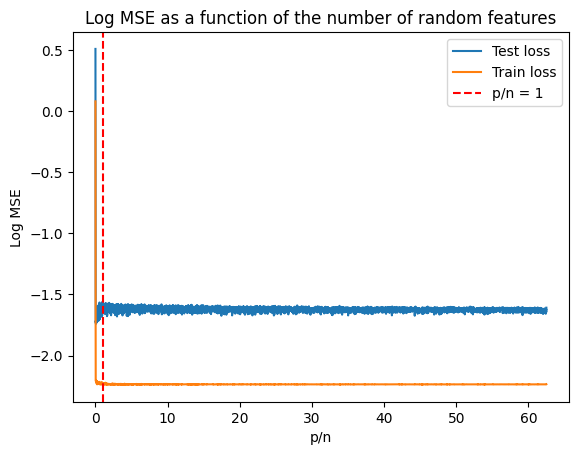

In [61]:
# Plot the loss - scaling left and right axis for better visualization
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.plot(p_over_n, np.log(random_feature_regression_train_loss), label='Train loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

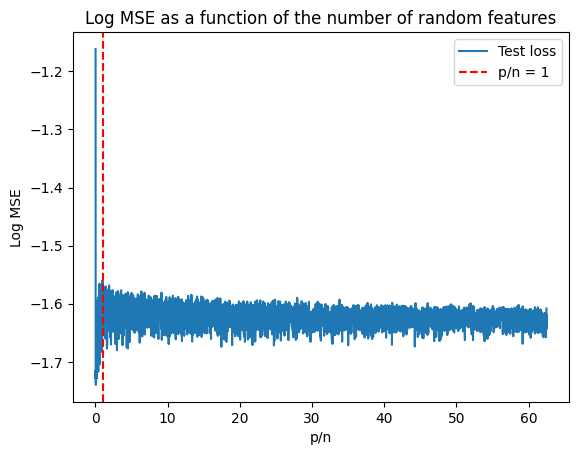

In [62]:
# Plot the loss 
starting_point = 2
plt.plot(p_over_n[starting_point:], np.log(random_feature_regression_test_loss)[starting_point:], label='Test loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

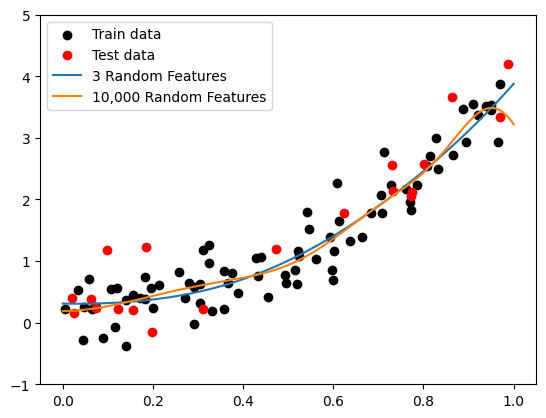

In [22]:
# Train 3rd degree polynomial regression
m1 = 3
model_deg3 = RandomFeatureRegressor(num_features=m1, gamma=3, alpha=0.01)
model_deg3.fit(x_train2, y_train)

# Train 30 degree polynomial regression
m2 = 10000
model_deg30 = RandomFeatureRegressor(num_features=m2, gamma=3, alpha=0.01)
model_deg30.fit(x_train2, y_train)

# Plot 
plt.scatter(x_train, y_train, label='Train data', color='black')
plt.scatter(x_test, y_test, label='Test data', color='red')
x_plot = np.linspace(0, 1, 1000)
x_plot2 = np.array([[x, x ** 2, x ** 3] for x in x_plot])
y_plot = model_deg3.predict(np.array(x_plot2))
plt.plot(x_plot, y_plot, label='3 Random Features')
y_plot = model_deg30.predict(np.array(x_plot2))
plt.plot(x_plot, y_plot, label='10,000 Random Features')
plt.ylim(-1, 5)
plt.legend()
plt.show()


_________
# Part 2: ReLu Activation

In [6]:
# Generate some data
np.random.seed(42)
num_datapoints = 500

# uniform 50 datapoints between 0 and 1
x1 = np.random.rand(num_datapoints)
x2 = np.random.rand(num_datapoints)
x3 = np.random.rand(num_datapoints)
X = np.array([x1, x2, x3]).T

y = x1 + x2 * x3 - 0.5 * x1**2 * x3 - x3 + 0.5 * np.random.randn(num_datapoints)

# y0 = x1 + x2 * x3 - 0.5 * x1**2 * x3 - x3
# y1 = y0 + 0.5 * np.random.randn(num_datapoints)
# y2 = y0 + 1 * np.random.randn(num_datapoints)
# y3 = y0 + 2 * np.random.randn(num_datapoints)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

n = len(x_train)

In [8]:
# create a random feature regressor class
# ReLu activation function
class RandomFeatureRegressor:
    def __init__(self, num_features, gamma=1.0, alpha = 0):
        self.num_features = num_features
        self.gamma = gamma
        self.alpha = alpha

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        n_samples, n_features = X.shape
        self.W = np.random.normal(0, 1, (self.num_features, n_features))
        self.b = np.random.uniform(0, 2 * np.pi, self.num_features)
        Z = self._transform(X)
        if self.alpha == 0: 
            self.model = LinearRegression()
        else: 
            self.model = Ridge(alpha=self.alpha)
        self.model.fit(Z, y)

    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        Z = self._transform(X)
        return self.model.predict(Z)

    def _transform(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        Z = np.dot(X, self.W.T) * np.sqrt(2 * self.gamma) + self.b
        return np.maximum(Z, 0)


In [9]:
random_feature_regression_test_loss = []
random_feature_regression_train_loss = []
p_over_n = []
for m in range(1, 15000):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=0.001)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    p_over_n.append(m / n)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))

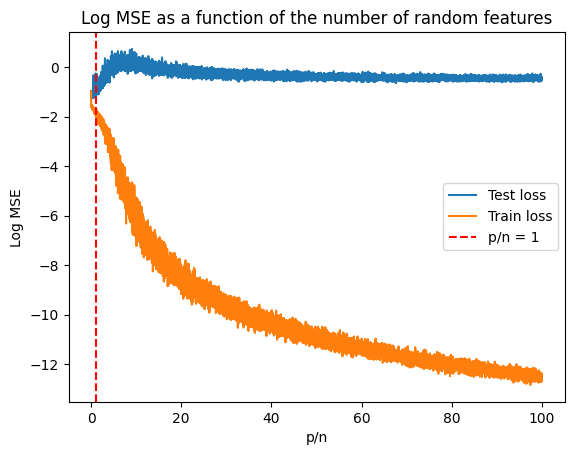

In [10]:
# Plot the loss
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.plot(p_over_n, np.log(random_feature_regression_train_loss), label='Train loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

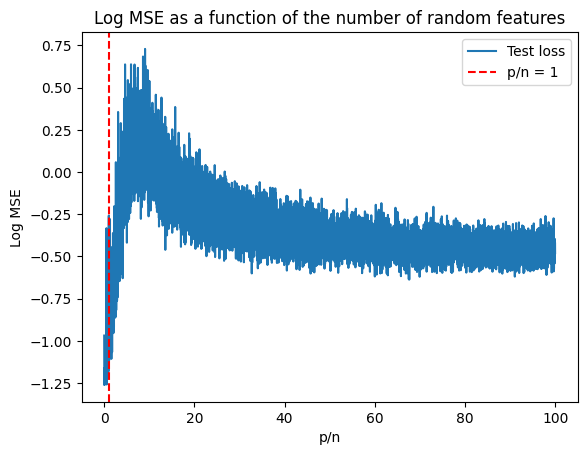

In [11]:
# Plot the loss - scaling left and right axis for better visualization
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

# Real Example Dataset

Let's look at a readily available dataset: California Housing Data

In [12]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [13]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [14]:
# Downsample the dataset so that we have a tractable number of datapoints for my laptop
df = df.sample(2500, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.5)

In [16]:
n = len(X_train)

In [17]:
num_features = []
p_over_n = []
random_feature_regression_test_loss = []
random_feature_regression_train_loss = []

alpha = 0

for m in range(1, 1000):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    num_features.append(m)
    p_over_n.append(m / n)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))

print("Done with first loop")

for m in range(1000, 2000, 20):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    num_features.append(m)
    p_over_n.append(m / n)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))

print("Done with second loop")

for m in range(2000, 5000, 100):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    num_features.append(m)
    p_over_n.append(m / n)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))


Done with first loop
Done with second loop


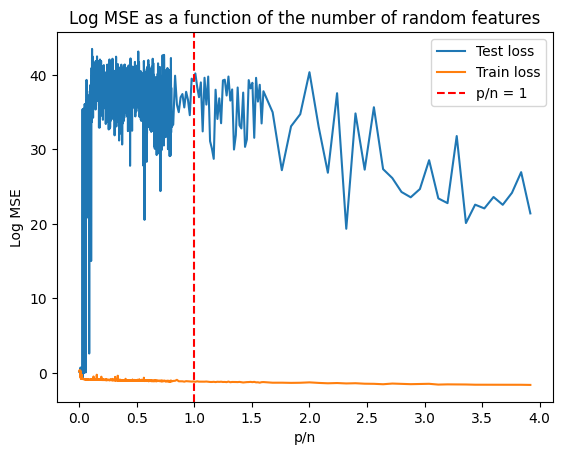

In [18]:
# Plot the loss 
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.plot(p_over_n, np.log(random_feature_regression_train_loss), label='Train loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

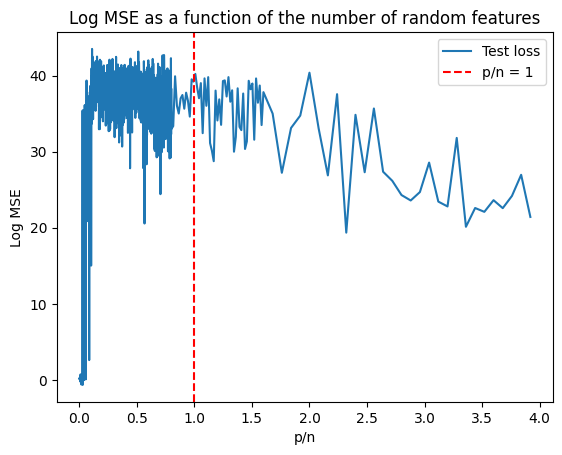

In [19]:
# Plot the loss 
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

# Let's add a Ridge penalty

In [25]:
num_features = []
p_over_n = []
random_feature_regression_test_loss = []
random_feature_regression_train_loss = []

alpha = 0.01

for m in range(1, 1000):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    p_over_n.append(m / n)
    num_features.append(m)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))

print("Done with first loop")

for m in range(1000, 2000, 20):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    p_over_n.append(m / n)
    num_features.append(m)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))

print("Done with second loop")

for m in range(2000, 100000, 100):
    model = RandomFeatureRegressor(num_features=m, gamma=1, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    p_over_n.append(m / n)
    num_features.append(m)
    random_feature_regression_test_loss.append(np.mean((y_pred_test - y_test) ** 2))
    random_feature_regression_train_loss.append(np.mean((y_pred_train - y_train) ** 2))


Done with first loop


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.07749e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=8.25421e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.03086e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


Done with second loop


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.07653e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.08487e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=9.45765e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=9.54713e-17): result may n

KeyboardInterrupt: 

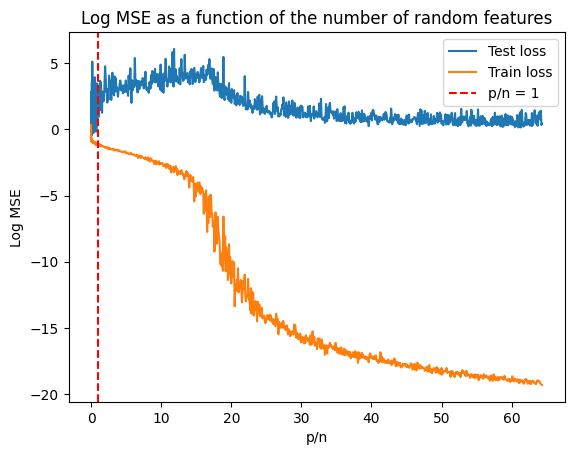

In [ ]:
# Plot the loss 
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.plot(p_over_n, np.log(random_feature_regression_train_loss), label='Train loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()


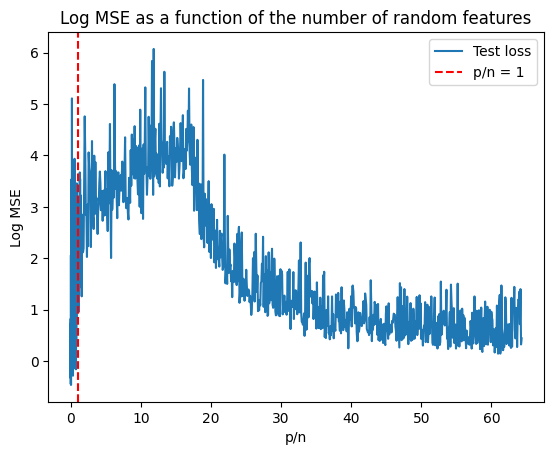

In [27]:
# Plot the loss 
plt.plot(p_over_n, np.log(random_feature_regression_test_loss), label='Test loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.title('Log MSE as a function of the number of random features')
plt.xlabel('p/n')
plt.ylabel('Log MSE')
plt.legend()
plt.show()

# Finally, let's try a neural net


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.regularizers import l2


# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# # learning rate scheduling based on validation loss
# callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001
# )

# Early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=50, restore_best_weights=True
)



# Train and evaluate the model
widths = [16, 32, 64, 128, 192, 256, 384, 512, 1024]
widths = range(16, 512, 16)
num_params = []
train_losses = []
test_losses = []
p_over_n = []

alpha = 0
epochs = 250

for width in range(16, 512, 8):
    print(f'Training model with width {width}...')
    # Construct the model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(width, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)))
    model.add(Dense(1, kernel_regularizer=l2(alpha)))  # Output layer for regression

    # Compile model - l2 regularizer
    model.compile(optimizer='adam', loss='mean_squared_error')

    validation_data = (X_test, y_test)
    # Train the model
    model.fit(X_train, y_train, validation_data=validation_data, epochs=epochs, batch_size=64, verbose=0, callbacks=[lr_scheduler_callback, early_stopping_callback])

    # Evaluate the model
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    # Store the number of parameters and losses
    num_params.append(model.count_params())
    p_over_n.append(model.count_params() / n)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Training model with width 16...
Training model with width 24...
Training model with width 32...
Training model with width 40...
Training model with width 48...
Training model with width 56...
Training model with width 64...
Training model with width 72...
Training model with width 80...
Training model with width 88...
Training model with width 96...
Training model with width 104...
Training model with width 112...
Training model with width 120...
Training model with width 128...
Training model with width 136...
Training model with width 144...
Training model with width 152...
Training model with width 160...
Training model with width 168...
Training model with width 176...
Training model with width 184...
Training model with width 192...
Training model with width 200...
Training model with width 208...
Training model with width 216...
Training model with width 224...
Training model with width 232...
Training model with width 240...
Training model with width 248...
Training model with w

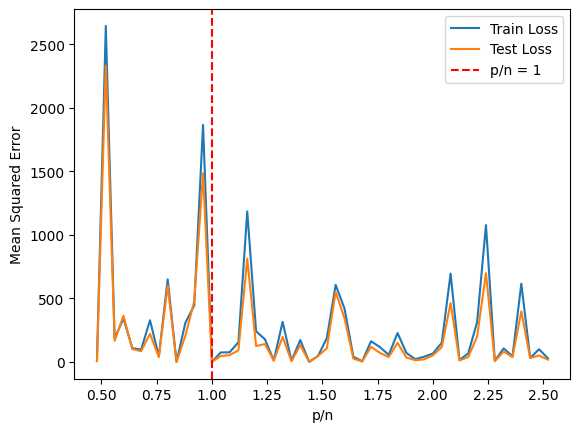

In [41]:
start_point = 10
plt.plot(p_over_n[start_point:], train_losses[start_point:], label='Train Loss')
plt.plot(p_over_n[start_point:], test_losses[start_point:], label='Test Loss')
plt.axvline(x=1, color='red', linestyle='--', label='p/n = 1')
plt.xlabel('p/n')
plt.ylabel('Mean Squared Error')
plt.legend()

I tried a wide range of things, but I just don't think I have the compute (and patience) available to run the proper experiments that would exhibit this phenomenon. 